In [1]:
import requests
import json
import datetime
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
year = "2019"
month = "10"
second = 28
second_str = str(second)

oct_data_19 = pd.DataFrame()

for day in range(1, 32):
    day_str = str(day)
    for hour in range(0, 24):
        hour_str = str(hour)
        for minute in range(0, 60, 20):
            minute_str = str(minute)
            site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
            print(site)
            response_API = requests.get(site)
            data = response_API.text
            data = json.loads(data)
            minute_new = minute
            while (not "items" in data or (len(data["items"]) == 0 and minute_new < 60)):
                minute_new = minute_new + 1
                minute_str = str(minute_new)
                site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
                print(site)
                response_API = requests.get(site)
                data = response_API.text
                data = json.loads(data)
                
            timestamp = data["items"][0]["timestamp"]
            print(timestamp)

            data = data["items"][0]["carpark_data"]
            with open("EE4211data.json", 'w') as fp:
                json.dump(data, fp)
            dt = (pd.read_json("EE4211data.json"))
            for heading in ("total_lots","lot_type","lots_available"):
                dt[heading] = dt["carpark_info"].apply(lambda x: x[0][heading])
            dt = dt.drop(["carpark_info"], axis=1)
            oct_data_19 = oct_data_19.append(dt)

# only to be run once
# to replicate the code and store data in a file, uncomment the line below
oct_data_19.to_csv("Oct2019_data_Q3.csv", index = False)

oct_data_19

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T00%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T00%3A01%3A28
2019-10-01T00:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T00%3A20%3A28
2019-10-01T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T00%3A40%3A28
2019-10-01T00:39:40+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T01%3A00%3A28
2019-10-01T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T01%3A20%3A28
2019-10-01T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T01%3A40%3A28
2019-10-01T01:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T02%3A00%3A28
2019-10-01T01:59:28+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T02%

2019-10-01T22:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T23%3A00%3A28
2019-10-01T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T23%3A20%3A28
2019-10-01T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-01T23%3A40%3A28
2019-10-01T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T00%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T00%3A01%3A28
2019-10-02T00:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T00%3A20%3A28
2019-10-02T00:19:28+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T00%3A40%3A28
2019-10-02T00:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T01%3A00%3A28
2019-10-02T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2019-10-02T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T22%3A00%3A28
2019-10-02T21:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T22%3A20%3A28
2019-10-02T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T22%3A40%3A28
2019-10-02T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T23%3A00%3A28
2019-10-02T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T23%3A20%3A28
2019-10-02T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-02T23%3A40%3A28
2019-10-02T23:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T00%3A00%3A28
2019-10-03T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T00%3A20%3A28
2019-10-03T00:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-03T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T21%3A20%3A28
2019-10-03T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T21%3A40%3A28
2019-10-03T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T22%3A00%3A28
2019-10-03T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T22%3A20%3A28
2019-10-03T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T22%3A40%3A28
2019-10-03T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T23%3A00%3A28
2019-10-03T22:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T23%3A20%3A28
2019-10-03T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-03T23%3A40%3A28
2019-10-03T23:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-04T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T20%3A40%3A28
2019-10-04T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T21%3A00%3A28
2019-10-04T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T21%3A20%3A28
2019-10-04T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T21%3A40%3A28
2019-10-04T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T22%3A00%3A28
2019-10-04T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T22%3A20%3A28
2019-10-04T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T22%3A40%3A28
2019-10-04T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-04T23%3A00%3A28
2019-10-04T23:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-05T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T20%3A00%3A28
2019-10-05T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T20%3A20%3A28
2019-10-05T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T20%3A40%3A28
2019-10-05T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T21%3A00%3A28
2019-10-05T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T21%3A20%3A28
2019-10-05T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T21%3A40%3A28
2019-10-05T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T22%3A00%3A28
2019-10-05T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-05T22%3A20%3A28
2019-10-05T22:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-06T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T19%3A20%3A28
2019-10-06T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T19%3A40%3A28
2019-10-06T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T20%3A00%3A28
2019-10-06T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T20%3A20%3A28
2019-10-06T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T20%3A40%3A28
2019-10-06T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T21%3A00%3A28
2019-10-06T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T21%3A20%3A28
2019-10-06T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-06T21%3A40%3A28
2019-10-06T21:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-07T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T18%3A40%3A28
2019-10-07T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T19%3A00%3A28
2019-10-07T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T19%3A20%3A28
2019-10-07T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T19%3A40%3A28
2019-10-07T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T20%3A00%3A28
2019-10-07T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T20%3A20%3A28
2019-10-07T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T20%3A40%3A28
2019-10-07T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-07T21%3A00%3A28
2019-10-07T21:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-08T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T18%3A00%3A28
2019-10-08T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T18%3A20%3A28
2019-10-08T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T18%3A40%3A28
2019-10-08T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T19%3A00%3A28
2019-10-08T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T19%3A20%3A28
2019-10-08T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T19%3A40%3A28
2019-10-08T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T20%3A00%3A28
2019-10-08T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-08T20%3A20%3A28
2019-10-08T20:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-09T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T17%3A20%3A28
2019-10-09T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T17%3A40%3A28
2019-10-09T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T18%3A00%3A28
2019-10-09T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T18%3A20%3A28
2019-10-09T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T18%3A40%3A28
2019-10-09T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T19%3A00%3A28
2019-10-09T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T19%3A20%3A28
2019-10-09T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-09T19%3A40%3A28
2019-10-09T19:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-10T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T16%3A40%3A28
2019-10-10T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T17%3A00%3A28
2019-10-10T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T17%3A20%3A28
2019-10-10T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T17%3A40%3A28
2019-10-10T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T18%3A00%3A28
2019-10-10T17:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T18%3A20%3A28
2019-10-10T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T18%3A40%3A28
2019-10-10T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-10T19%3A00%3A28
2019-10-10T19:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-11T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T16%3A00%3A28
2019-10-11T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T16%3A20%3A28
2019-10-11T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T16%3A40%3A28
2019-10-11T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T17%3A00%3A28
2019-10-11T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T17%3A20%3A28
2019-10-11T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T17%3A40%3A28
2019-10-11T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T18%3A00%3A28
2019-10-11T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-11T18%3A20%3A28
2019-10-11T18:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-12T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T15%3A20%3A28
2019-10-12T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T15%3A40%3A28
2019-10-12T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T16%3A00%3A28
2019-10-12T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T16%3A20%3A28
2019-10-12T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T16%3A40%3A28
2019-10-12T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T17%3A00%3A28
2019-10-12T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T17%3A20%3A28
2019-10-12T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-12T17%3A40%3A28
2019-10-12T17:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-13T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T14%3A40%3A28
2019-10-13T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T15%3A00%3A28
2019-10-13T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T15%3A20%3A28
2019-10-13T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T15%3A40%3A28
2019-10-13T15:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T16%3A00%3A28
2019-10-13T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T16%3A20%3A28
2019-10-13T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T16%3A40%3A28
2019-10-13T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-13T17%3A00%3A28
2019-10-13T16:59:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-14T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T14%3A00%3A28
2019-10-14T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T14%3A20%3A28
2019-10-14T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T14%3A40%3A28
2019-10-14T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T15%3A00%3A28
2019-10-14T15:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T15%3A20%3A28
2019-10-14T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T15%3A40%3A28
2019-10-14T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T16%3A00%3A28
2019-10-14T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-14T16%3A20%3A28
2019-10-14T16:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-15T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T13%3A20%3A28
2019-10-15T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T13%3A40%3A28
2019-10-15T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T14%3A00%3A28
2019-10-15T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T14%3A20%3A28
2019-10-15T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T14%3A40%3A28
2019-10-15T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T15%3A00%3A28
2019-10-15T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T15%3A20%3A28
2019-10-15T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-15T15%3A40%3A28
2019-10-15T15:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-16T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T12%3A40%3A28
2019-10-16T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T13%3A00%3A28
2019-10-16T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T13%3A20%3A28
2019-10-16T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T13%3A40%3A28
2019-10-16T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T14%3A00%3A28
2019-10-16T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T14%3A20%3A28
2019-10-16T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T14%3A40%3A28
2019-10-16T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-16T15%3A00%3A28
2019-10-16T15:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-17T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T12%3A00%3A28
2019-10-17T11:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T12%3A20%3A28
2019-10-17T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T12%3A40%3A28
2019-10-17T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T13%3A00%3A28
2019-10-17T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T13%3A20%3A28
2019-10-17T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T13%3A40%3A28
2019-10-17T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T14%3A00%3A28
2019-10-17T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-17T14%3A20%3A28
2019-10-17T14:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-18T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T11%3A00%3A28
2019-10-18T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T11%3A20%3A28
2019-10-18T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T11%3A40%3A28
2019-10-18T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T12%3A00%3A28
2019-10-18T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T12%3A20%3A28
2019-10-18T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T12%3A40%3A28
2019-10-18T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T13%3A00%3A28
2019-10-18T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-18T13%3A20%3A28
2019-10-18T13:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-19T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T10%3A20%3A28
2019-10-19T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T10%3A40%3A28
2019-10-19T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T11%3A00%3A28
2019-10-19T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T11%3A20%3A28
2019-10-19T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T11%3A40%3A28
2019-10-19T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T12%3A00%3A28
2019-10-19T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T12%3A20%3A28
2019-10-19T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-19T12%3A40%3A28
2019-10-19T12:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-20T09:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T09%3A40%3A28
2019-10-20T09:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T10%3A00%3A28
2019-10-20T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T10%3A20%3A28
2019-10-20T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T10%3A40%3A28
2019-10-20T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T11%3A00%3A28
2019-10-20T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T11%3A20%3A28
2019-10-20T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T11%3A40%3A28
2019-10-20T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-20T12%3A00%3A28
2019-10-20T12:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-21T08:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T09%3A00%3A28
2019-10-21T09:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T09%3A20%3A28
2019-10-21T09:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T09%3A40%3A28
2019-10-21T09:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T10%3A00%3A28
2019-10-21T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T10%3A20%3A28
2019-10-21T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T10%3A40%3A28
2019-10-21T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T11%3A00%3A28
2019-10-21T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-21T11%3A20%3A28
2019-10-21T11:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-22T07:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T08%3A00%3A28
2019-10-22T08:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T08%3A20%3A28
2019-10-22T08:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T08%3A40%3A28
2019-10-22T08:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T09%3A00%3A28
2019-10-22T09:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T09%3A20%3A28
2019-10-22T09:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T09%3A40%3A28
2019-10-22T09:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T10%3A00%3A28
2019-10-22T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-22T10%3A20%3A28
2019-10-22T10:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-23T07:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T07%3A20%3A28
2019-10-23T07:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T07%3A40%3A28
2019-10-23T07:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T08%3A00%3A28
2019-10-23T08:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T08%3A20%3A28
2019-10-23T08:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T08%3A40%3A28
2019-10-23T08:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T09%3A00%3A28
2019-10-23T09:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T09%3A20%3A28
2019-10-23T09:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-23T09%3A40%3A28
2019-10-23T09:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-24T06:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T06%3A40%3A28
2019-10-24T06:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T07%3A00%3A28
2019-10-24T07:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T07%3A20%3A28
2019-10-24T07:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T07%3A40%3A28
2019-10-24T07:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T08%3A00%3A28
2019-10-24T08:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T08%3A20%3A28
2019-10-24T08:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T08%3A40%3A28
2019-10-24T08:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-24T09%3A00%3A28
2019-10-24T09:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-25T05:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T06%3A00%3A28
2019-10-25T06:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T06%3A20%3A28
2019-10-25T06:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T06%3A40%3A28
2019-10-25T06:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T07%3A00%3A28
2019-10-25T07:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T07%3A20%3A28
2019-10-25T07:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T07%3A40%3A28
2019-10-25T07:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T08%3A00%3A28
2019-10-25T08:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-25T08%3A20%3A28
2019-10-25T08:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-26T05:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T05%3A20%3A28
2019-10-26T05:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T05%3A40%3A28
2019-10-26T05:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T06%3A00%3A28
2019-10-26T06:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T06%3A20%3A28
2019-10-26T06:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T06%3A40%3A28
2019-10-26T06:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T07%3A00%3A28
2019-10-26T07:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T07%3A20%3A28
2019-10-26T07:19:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-26T07%3A40%3A28
2019-10-26T07:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-27T04:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T04%3A40%3A28
2019-10-27T04:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T05%3A00%3A28
2019-10-27T05:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T05%3A20%3A28
2019-10-27T05:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T05%3A40%3A28
2019-10-27T05:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T06%3A00%3A28
2019-10-27T06:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T06%3A20%3A28
2019-10-27T06:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T06%3A40%3A28
2019-10-27T06:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-27T07%3A00%3A28
2019-10-27T07:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-28T03:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T04%3A00%3A28
2019-10-28T04:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T04%3A20%3A28
2019-10-28T04:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T04%3A40%3A28
2019-10-28T04:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T05%3A00%3A28
2019-10-28T05:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T05%3A20%3A28
2019-10-28T05:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T05%3A40%3A28
2019-10-28T05:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T06%3A00%3A28
2019-10-28T06:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-28T06%3A20%3A28
2019-10-28T06:20:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-29T03:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T03%3A20%3A28
2019-10-29T03:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T03%3A40%3A28
2019-10-29T03:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T04%3A00%3A28
2019-10-29T04:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T04%3A20%3A28
2019-10-29T04:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T04%3A40%3A28
2019-10-29T04:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T05%3A00%3A28
2019-10-29T05:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T05%3A20%3A28
2019-10-29T05:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-29T05%3A40%3A28
2019-10-29T05:40:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-30T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T02%3A40%3A28
2019-10-30T02:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T03%3A00%3A28
2019-10-30T03:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T03%3A20%3A28
2019-10-30T03:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T03%3A40%3A28
2019-10-30T03:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T04%3A00%3A28
2019-10-30T04:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T04%3A20%3A28
2019-10-30T04:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T04%3A40%3A28
2019-10-30T04:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-30T05%3A00%3A28
2019-10-30T05:00:27+08:00
https://api.data.gov.sg/v1/tra

2019-10-31T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T01%3A40%3A28
2019-10-31T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T02%3A00%3A28
2019-10-31T02:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T02%3A20%3A28
2019-10-31T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T02%3A40%3A28
2019-10-31T02:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T03%3A00%3A28
2019-10-31T03:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T03%3A20%3A28
2019-10-31T03:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T03%3A40%3A28
2019-10-31T03:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2019-10-31T04%3A00%3A28
2019-10-31T04:00:27+08:00
https://api.data.gov.sg/v1/tra

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2019-09-30T23:59:46,91,C,57
1,HLM,2019-10-01T00:00:52,583,C,496
2,RHM,2019-10-01T00:00:47,322,C,150
3,BM29,2019-10-01T00:00:53,97,C,84
4,Q81,2019-10-01T00:01:10,96,C,73
...,...,...,...,...,...
2023,BA3,2019-10-31T23:39:09,100,C,100
2024,SK97,2019-10-31T16:45:09,500,C,498
2025,S113,2019-10-31T16:44:54,500,C,500
2026,S13L,2019-10-31T16:45:06,500,C,498


In [5]:
year = "2021"
month = "10"
second = 28
second_str = str(second)

oct_data_21 = pd.DataFrame()

for day in range(1, 32):
    day_str = str(day)
    for hour in range(0, 24):
        hour_str = str(hour)
        for minute in range(0, 60, 20):
            minute_str = str(minute)
            site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
            print(site)
            response_API = requests.get(site)
            data = response_API.text
            data = json.loads(data)
            minute_new = minute
            while (not "items" in data or (len(data["items"]) == 0 and minute_new < 60)):
                minute_new = minute_new + 1
                minute_str = str(minute_new)
                site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minute_str.zfill(2)}%3A{second_str.zfill(2)}'
                print(site)
                response_API = requests.get(site)
                data = response_API.text
                data = json.loads(data)
                
            timestamp = data["items"][0]["timestamp"]
            print(timestamp)

            data = data["items"][0]["carpark_data"]
            with open("EE4211data.json", 'w') as fp:
                json.dump(data, fp)
            dt = (pd.read_json("EE4211data.json"))
            for heading in ("total_lots","lot_type","lots_available"):
                dt[heading] = dt["carpark_info"].apply(lambda x: x[0][heading])
            dt = dt.drop(["carpark_info"], axis=1)
            oct_data_21 = oct_data_21.append(dt)

# only to be run once
# to replicate the code and store data in a file, uncomment the line below
oct_data_21.to_csv("Oct2019_data_Q3.csv", index = False)

oct_data_21

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T00%3A00%3A28
2021-10-01T00:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T00%3A20%3A28
2021-10-01T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T00%3A40%3A28
2021-10-01T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T01%3A00%3A28
2021-10-01T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T01%3A20%3A28
2021-10-01T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T01%3A40%3A28
2021-10-01T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T02%3A00%3A28
2021-10-01T02:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T02%3A20%3A28
2021-10-01T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2021-10-01T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T23%3A20%3A28
2021-10-01T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-01T23%3A40%3A28
2021-10-01T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T00%3A00%3A28
2021-10-02T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T00%3A20%3A28
2021-10-02T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T00%3A40%3A28
2021-10-02T00:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T01%3A00%3A28
2021-10-02T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T01%3A20%3A28
2021-10-02T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T01%3A40%3A28
2021-10-02T01:40:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-02T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T22%3A40%3A28
2021-10-02T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T23%3A00%3A28
2021-10-02T23:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T23%3A20%3A28
2021-10-02T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-02T23%3A40%3A28
2021-10-02T23:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T00%3A00%3A28
2021-10-03T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T00%3A20%3A28
2021-10-03T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T00%3A40%3A28
2021-10-03T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T01%3A00%3A28
2021-10-03T01:00:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-03T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T22%3A00%3A28
2021-10-03T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T22%3A20%3A28
2021-10-03T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T22%3A40%3A28
2021-10-03T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T23%3A00%3A28
2021-10-03T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T23%3A20%3A28
2021-10-03T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-03T23%3A40%3A28
2021-10-03T23:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T00%3A00%3A28
2021-10-04T00:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T00%3A20%3A28
2021-10-04T00:20:26+08:00
https://api.data.gov.sg/v1/tra

2021-10-04T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T21%3A20%3A28
2021-10-04T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T21%3A40%3A28
2021-10-04T21:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T22%3A00%3A28
2021-10-04T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T22%3A20%3A28
2021-10-04T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T22%3A40%3A28
2021-10-04T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T23%3A00%3A28
2021-10-04T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T23%3A20%3A28
2021-10-04T23:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-04T23%3A40%3A28
2021-10-04T23:40:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-05T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T20%3A40%3A28
2021-10-05T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T21%3A00%3A28
2021-10-05T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T21%3A20%3A28
2021-10-05T21:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T21%3A40%3A28
2021-10-05T21:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T22%3A00%3A28
2021-10-05T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T22%3A20%3A28
2021-10-05T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T22%3A40%3A28
2021-10-05T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-05T23%3A00%3A28
2021-10-05T23:00:26+08:00
https://api.data.gov.sg/v1/tra

2021-10-06T19:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T19%3A20%3A28
2021-10-06T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T19%3A40%3A28
2021-10-06T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T20%3A00%3A28
2021-10-06T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T20%3A20%3A28
2021-10-06T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T20%3A40%3A28
2021-10-06T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T21%3A00%3A28
2021-10-06T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T21%3A20%3A28
2021-10-06T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-06T21%3A40%3A28
2021-10-06T21:40:26+08:00
https://api.data.gov.sg/v1/tra

2021-10-07T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T18%3A40%3A28
2021-10-07T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T19%3A00%3A28
2021-10-07T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T19%3A20%3A28
2021-10-07T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T19%3A40%3A28
2021-10-07T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T20%3A00%3A28
2021-10-07T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T20%3A20%3A28
2021-10-07T20:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T20%3A40%3A28
2021-10-07T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T21%3A00%3A28
2021-10-07T21:00:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-08T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T18%3A00%3A28
2021-10-08T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T18%3A20%3A28
2021-10-08T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T18%3A40%3A28
2021-10-08T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T19%3A00%3A28
2021-10-08T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T19%3A20%3A28
2021-10-08T19:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T19%3A40%3A28
2021-10-08T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T20%3A00%3A28
2021-10-08T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-08T20%3A20%3A28
2021-10-08T20:20:26+08:00
https://api.data.gov.sg/v1/tra

2021-10-09T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T17%3A20%3A28
2021-10-09T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T17%3A40%3A28
2021-10-09T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T18%3A00%3A28
2021-10-09T18:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T18%3A20%3A28
2021-10-09T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T18%3A40%3A28
2021-10-09T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T19%3A00%3A28
2021-10-09T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T19%3A20%3A28
2021-10-09T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-09T19%3A40%3A28
2021-10-09T19:40:26+08:00
https://api.data.gov.sg/v1/tra

2021-10-10T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T16%3A40%3A28
2021-10-10T16:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T17%3A00%3A28
2021-10-10T17:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T17%3A20%3A28
2021-10-10T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T17%3A40%3A28
2021-10-10T17:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T18%3A00%3A28
2021-10-10T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T18%3A20%3A28
2021-10-10T18:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T18%3A40%3A28
2021-10-10T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-10T19%3A00%3A28
2021-10-10T19:00:26+08:00
https://api.data.gov.sg/v1/tra

2021-10-11T15:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T16%3A00%3A28
2021-10-11T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T16%3A20%3A28
2021-10-11T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T16%3A40%3A28
2021-10-11T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T17%3A00%3A28
2021-10-11T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T17%3A20%3A28
2021-10-11T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T17%3A40%3A28
2021-10-11T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T18%3A00%3A28
2021-10-11T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-11T18%3A20%3A28
2021-10-11T18:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-12T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T14%3A40%3A28
2021-10-12T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T15%3A00%3A28
2021-10-12T15:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T15%3A20%3A28
2021-10-12T15:19:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T15%3A40%3A28
2021-10-12T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T16%3A00%3A28
2021-10-12T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T16%3A20%3A28
2021-10-12T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T16%3A40%3A28
2021-10-12T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-12T17%3A00%3A28
2021-10-12T17:00:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-13T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T14%3A00%3A28
2021-10-13T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T14%3A20%3A28
2021-10-13T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T14%3A40%3A28
2021-10-13T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T15%3A00%3A28
2021-10-13T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T15%3A20%3A28
2021-10-13T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T15%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T15%3A41%3A28
2021-10-13T15:41:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-13T16%3A00%3A28
2021-10-13T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2021-10-14T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T13%3A00%3A28
2021-10-14T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T13%3A20%3A28
2021-10-14T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T13%3A40%3A28
2021-10-14T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T14%3A00%3A28
2021-10-14T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T14%3A20%3A28
2021-10-14T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T14%3A40%3A28
2021-10-14T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T15%3A00%3A28
2021-10-14T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-14T15%3A20%3A28
2021-10-14T15:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-15T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T12%3A00%3A28
2021-10-15T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T12%3A20%3A28
2021-10-15T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T12%3A40%3A28
2021-10-15T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T13%3A00%3A28
2021-10-15T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T13%3A20%3A28
2021-10-15T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T13%3A40%3A28
2021-10-15T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T14%3A00%3A28
2021-10-15T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-15T14%3A20%3A28
2021-10-15T14:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-16T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T11%3A00%3A28
2021-10-16T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T11%3A20%3A28
2021-10-16T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T11%3A40%3A28
2021-10-16T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T12%3A00%3A28
2021-10-16T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T12%3A20%3A28
2021-10-16T12:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T12%3A40%3A28
2021-10-16T12:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T13%3A00%3A28
2021-10-16T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-16T13%3A20%3A28
2021-10-16T13:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-17T09:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T10%3A00%3A28
2021-10-17T10:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T10%3A20%3A28
2021-10-17T10:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T10%3A40%3A28
2021-10-17T10:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T11%3A00%3A28
2021-10-17T11:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T11%3A20%3A28
2021-10-17T11:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T11%3A40%3A28
2021-10-17T11:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T12%3A00%3A28
2021-10-17T12:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-17T12%3A20%3A28
2021-10-17T12:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-18T07:41:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T08%3A00%3A28
2021-10-18T08:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T08%3A20%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T08%3A21%3A28
2021-10-18T08:21:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T08%3A40%3A28
2021-10-18T08:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T09%3A00%3A28
2021-10-18T09:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T09%3A20%3A28
2021-10-18T09:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T09%3A40%3A28
2021-10-18T09:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T10%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-18T10%

2021-10-19T05:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T05%3A20%3A28
2021-10-19T05:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T05%3A40%3A28
2021-10-19T05:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T06%3A00%3A28
2021-10-19T06:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T06%3A20%3A28
2021-10-19T06:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T06%3A40%3A28
2021-10-19T06:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T07%3A00%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T07%3A01%3A28
2021-10-19T07:01:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-19T07%3A20%3A28
2021-10-19T07:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2021-10-20T03:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T03%3A20%3A28
2021-10-20T03:20:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T03%3A40%3A28
2021-10-20T03:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T04%3A00%3A28
2021-10-20T04:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T04%3A20%3A28
2021-10-20T04:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T04%3A40%3A28
2021-10-20T04:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T05%3A00%3A28
2021-10-20T05:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T05%3A20%3A28
2021-10-20T05:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-20T05%3A40%3A28
2021-10-20T05:40:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-21T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T02%3A00%3A28
2021-10-21T02:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T02%3A20%3A28
2021-10-21T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T02%3A40%3A28
2021-10-21T02:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T03%3A00%3A28
2021-10-21T03:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T03%3A20%3A28
2021-10-21T03:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T03%3A40%3A28
2021-10-21T03:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T04%3A00%3A28
2021-10-21T04:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T04%3A20%3A28
2021-10-21T04:20:27+08:00
https://api.data.gov.sg/v1/tra

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T23%3A00%3A28
2021-10-21T23:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T23%3A20%3A28
2021-10-21T23:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T23%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-21T23%3A41%3A28
2021-10-21T23:41:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T00%3A00%3A28
2021-10-22T00:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T00%3A20%3A28
2021-10-22T00:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T00%3A40%3A28
2021-10-22T00:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T01%3A00%3A28
2021-10-22T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T01%

2021-10-22T20:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T21%3A00%3A28
2021-10-22T21:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T21%3A20%3A28
2021-10-22T21:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T21%3A40%3A28
2021-10-22T21:39:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T22%3A00%3A28
2021-10-22T22:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T22%3A20%3A28
2021-10-22T22:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T22%3A40%3A28
2021-10-22T22:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T23%3A00%3A28
2021-10-22T22:59:30+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-22T23%3A20%3A28
2021-10-22T23:19:28+08:00
https://api.data.gov.sg/v1/tra

2021-10-23T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T18%3A00%3A28
2021-10-23T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T18%3A20%3A28
2021-10-23T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T18%3A40%3A28
2021-10-23T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T19%3A00%3A28
2021-10-23T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T19%3A20%3A28
2021-10-23T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T19%3A40%3A28
2021-10-23T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T20%3A00%3A28
2021-10-23T20:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-23T20%3A20%3A28
2021-10-23T20:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-24T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T14%3A20%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T14%3A21%3A28
2021-10-24T14:21:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T14%3A40%3A28
2021-10-24T14:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T15%3A00%3A28
2021-10-24T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T15%3A20%3A28
2021-10-24T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T15%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T15%3A41%3A28
2021-10-24T15:41:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T16%3A00%3A28
2021-10-24T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-24T16%

2021-10-25T06:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T07%3A00%3A28
2021-10-25T07:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T07%3A20%3A28
2021-10-25T07:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T07%3A40%3A28
2021-10-25T07:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T08%3A00%3A28
2021-10-25T08:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T08%3A20%3A28
2021-10-25T08:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T08%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T08%3A41%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T08%3A42%3A28
2021-10-25T08:42:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-25T09%

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T00%3A41%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T00%3A42%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T00%3A43%3A28
2021-10-26T00:43:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T01%3A00%3A28
2021-10-26T01:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T01%3A20%3A28
2021-10-26T01:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T01%3A40%3A28
2021-10-26T01:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T02%3A00%3A28
2021-10-26T02:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T02%3A20%3A28
2021-10-26T02:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T02%3A40%3A28
https://api.data

2021-10-26T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T17%3A40%3A28
2021-10-26T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T18%3A00%3A28
2021-10-26T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T18%3A20%3A28
2021-10-26T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T18%3A40%3A28
2021-10-26T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T19%3A00%3A28
2021-10-26T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T19%3A20%3A28
2021-10-26T19:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T19%3A40%3A28
2021-10-26T19:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-26T20%3A00%3A28
2021-10-26T19:59:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-27T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T17%3A00%3A28
2021-10-27T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T17%3A20%3A28
2021-10-27T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T17%3A40%3A28
2021-10-27T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T18%3A00%3A28
2021-10-27T18:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T18%3A20%3A28
2021-10-27T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T18%3A40%3A28
2021-10-27T18:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T19%3A00%3A28
2021-10-27T19:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-27T19%3A20%3A28
2021-10-27T19:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-28T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T16%3A20%3A28
2021-10-28T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T16%3A40%3A28
2021-10-28T16:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T17%3A00%3A28
2021-10-28T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T17%3A20%3A28
2021-10-28T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T17%3A40%3A28
2021-10-28T17:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T18%3A00%3A28
2021-10-28T18:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T18%3A20%3A28
2021-10-28T18:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-28T18%3A40%3A28
https://api.data.gov.sg/v1/transport/carpark-availabilit

2021-10-29T15:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T15%3A20%3A28
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T15%3A21%3A28
2021-10-29T15:21:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T15%3A40%3A28
2021-10-29T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T16%3A00%3A28
2021-10-29T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T16%3A20%3A28
2021-10-29T16:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T16%3A40%3A28
2021-10-29T16:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T17%3A00%3A28
2021-10-29T17:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-29T17%3A20%3A28
2021-10-29T17:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availabilit

2021-10-30T13:40:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T14%3A00%3A28
2021-10-30T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T14%3A20%3A28
2021-10-30T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T14%3A40%3A28
2021-10-30T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T15%3A00%3A28
2021-10-30T15:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T15%3A20%3A28
2021-10-30T15:19:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T15%3A40%3A28
2021-10-30T15:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T16%3A00%3A28
2021-10-30T16:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-30T16%3A20%3A28
2021-10-30T16:20:27+08:00
https://api.data.gov.sg/v1/tra

2021-10-31T13:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T13%3A20%3A28
2021-10-31T13:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T13%3A40%3A28
2021-10-31T13:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T14%3A00%3A28
2021-10-31T14:00:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T14%3A20%3A28
2021-10-31T14:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T14%3A40%3A28
2021-10-31T14:40:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T15%3A00%3A28
2021-10-31T15:00:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T15%3A20%3A28
2021-10-31T15:20:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-31T15%3A40%3A28
2021-10-31T15:40:27+08:00
https://api.data.gov.sg/v1/tra

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2021-09-30T23:37:29,105,C,62
1,HLM,2021-09-30T23:37:39,583,C,486
2,RHM,2021-09-30T23:37:29,329,C,128
3,BM29,2021-09-30T23:37:35,97,C,88
4,Q81,2021-09-30T23:37:16,96,C,74
...,...,...,...,...,...
1947,B65M,2021-10-31T23:35:24,665,C,500
1948,B65L,2021-10-31T23:35:24,6,C,0
1949,BE3,2021-10-31T23:25:32,306,C,34
1950,BE3R,2021-10-31T23:25:32,195,C,113


In [6]:
oct_data_21.to_csv("Oct2021_data_Q3.csv", index = False)

In [7]:
oct_data_19.to_csv("Oct2019_data_Q3.csv", index = False)

In [8]:
oct_data_19

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2019-09-30T23:59:46,91,C,57
1,HLM,2019-10-01T00:00:52,583,C,496
2,RHM,2019-10-01T00:00:47,322,C,150
3,BM29,2019-10-01T00:00:53,97,C,84
4,Q81,2019-10-01T00:01:10,96,C,73
...,...,...,...,...,...
2023,BA3,2019-10-31T23:39:09,100,C,100
2024,SK97,2019-10-31T16:45:09,500,C,498
2025,S113,2019-10-31T16:44:54,500,C,500
2026,S13L,2019-10-31T16:45:06,500,C,498


In [9]:
oct_data_21

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2021-09-30T23:37:29,105,C,62
1,HLM,2021-09-30T23:37:39,583,C,486
2,RHM,2021-09-30T23:37:29,329,C,128
3,BM29,2021-09-30T23:37:35,97,C,88
4,Q81,2021-09-30T23:37:16,96,C,74
...,...,...,...,...,...
1947,B65M,2021-10-31T23:35:24,665,C,500
1948,B65L,2021-10-31T23:35:24,6,C,0
1949,BE3,2021-10-31T23:25:32,306,C,34
1950,BE3R,2021-10-31T23:25:32,195,C,113


## Data Cleaning

In [10]:
oct_data_19_df = pd.read_csv("Oct2019_data_Q3.csv")
oct_data_19_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2019-09-30T23:59:46,91,C,57
1,HLM,2019-10-01T00:00:52,583,C,496
2,RHM,2019-10-01T00:00:47,322,C,150
3,BM29,2019-10-01T00:00:53,97,C,84
4,Q81,2019-10-01T00:01:10,96,C,73
...,...,...,...,...,...
4514469,BA3,2019-10-31T23:39:09,100,C,100
4514470,SK97,2019-10-31T16:45:09,500,C,498
4514471,S113,2019-10-31T16:44:54,500,C,500
4514472,S13L,2019-10-31T16:45:06,500,C,498


In [11]:
oct_data_21_df = pd.read_csv("Oct2021_data_Q3.csv")
oct_data_21_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2021-09-30T23:37:29,105,C,62
1,HLM,2021-09-30T23:37:39,583,C,486
2,RHM,2021-09-30T23:37:29,329,C,128
3,BM29,2021-09-30T23:37:35,97,C,88
4,Q81,2021-09-30T23:37:16,96,C,74
...,...,...,...,...,...
4357320,B65M,2021-10-31T23:35:24,665,C,500
4357321,B65L,2021-10-31T23:35:24,6,C,0
4357322,BE3,2021-10-31T23:25:32,306,C,34
4357323,BE3R,2021-10-31T23:25:32,195,C,113


In [12]:
oct_data_21_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357325 entries, 0 to 4357324
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
dtypes: int64(2), object(3)
memory usage: 166.2+ MB


In [13]:
oct_data_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514474 entries, 0 to 4514473
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
dtypes: int64(2), object(3)
memory usage: 172.2+ MB


In [14]:
oct_data_19_df.drop_duplicates(inplace = True, ignore_index = True)
oct_data_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032586 entries, 0 to 4032585
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
dtypes: int64(2), object(3)
memory usage: 153.8+ MB


In [15]:
oct_data_21_df.drop_duplicates(inplace = True, ignore_index = True)
oct_data_21_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678566 entries, 0 to 2678565
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   carpark_number   object
 1   update_datetime  object
 2   total_lots       int64 
 3   lot_type         object
 4   lots_available   int64 
dtypes: int64(2), object(3)
memory usage: 102.2+ MB


In [16]:
oct_data_19_df["update_datetime"] = pd.to_datetime(oct_data_19_df["update_datetime"])
oct_data_19_df["lots_available"] = pd.to_numeric(oct_data_19_df["lots_available"])
oct_data_19_df["total_lots"] = pd.to_numeric(oct_data_19_df["total_lots"])

oct_data_19_df["minute"] = oct_data_19_df["update_datetime"].dt.minute
oct_data_19_df["date"] = oct_data_19_df["update_datetime"].dt.date
oct_data_19_df["hour"] = oct_data_19_df["update_datetime"].dt.hour
oct_data_19_df["day"] = oct_data_19_df["update_datetime"].dt.day
oct_data_19_df["percent_lots_available"] = (oct_data_19_df["lots_available"]/oct_data_19_df["total_lots"]) * 100
oct_data_19_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2019-09-30 23:59:46,91,C,57,59,2019-09-30,23,30,62.637363
1,HLM,2019-10-01 00:00:52,583,C,496,0,2019-10-01,0,1,85.077187
2,RHM,2019-10-01 00:00:47,322,C,150,0,2019-10-01,0,1,46.583851
3,BM29,2019-10-01 00:00:53,97,C,84,0,2019-10-01,0,1,86.597938
4,Q81,2019-10-01 00:01:10,96,C,73,1,2019-10-01,0,1,76.041667


In [17]:
oct_data_21_df["update_datetime"] = pd.to_datetime(oct_data_21_df["update_datetime"])
oct_data_21_df["lots_available"] = pd.to_numeric(oct_data_21_df["lots_available"])
oct_data_21_df["total_lots"] = pd.to_numeric(oct_data_21_df["total_lots"])

oct_data_21_df["minute"] = oct_data_21_df["update_datetime"].dt.minute
oct_data_21_df["date"] = oct_data_21_df["update_datetime"].dt.date
oct_data_21_df["hour"] = oct_data_21_df["update_datetime"].dt.hour
oct_data_21_df["day"] = oct_data_21_df["update_datetime"].dt.day
oct_data_21_df["percent_lots_available"] = (oct_data_21_df["lots_available"]/oct_data_21_df["total_lots"]) * 100
oct_data_21_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2021-09-30 23:37:29,105,C,62,37,2021-09-30,23,30,59.047619
1,HLM,2021-09-30 23:37:39,583,C,486,37,2021-09-30,23,30,83.361921
2,RHM,2021-09-30 23:37:29,329,C,128,37,2021-09-30,23,30,38.905775
3,BM29,2021-09-30 23:37:35,97,C,88,37,2021-09-30,23,30,90.721649
4,Q81,2021-09-30 23:37:16,96,C,74,37,2021-09-30,23,30,77.083333


In [18]:
oct_data_19_cleaned = oct_data_19_df.loc[oct_data_19_df['date'] >= datetime.date(2019, 10, 1)]
oct_data_19_cleaned = oct_data_19_cleaned.loc[oct_data_19_df['date'] < datetime.date(2019, 11, 1)]
oct_data_19_cleaned.groupby('date').groups.keys()   

dict_keys([datetime.date(2019, 10, 1), datetime.date(2019, 10, 2), datetime.date(2019, 10, 3), datetime.date(2019, 10, 4), datetime.date(2019, 10, 5), datetime.date(2019, 10, 6), datetime.date(2019, 10, 7), datetime.date(2019, 10, 8), datetime.date(2019, 10, 9), datetime.date(2019, 10, 10), datetime.date(2019, 10, 11), datetime.date(2019, 10, 12), datetime.date(2019, 10, 13), datetime.date(2019, 10, 14), datetime.date(2019, 10, 15), datetime.date(2019, 10, 16), datetime.date(2019, 10, 17), datetime.date(2019, 10, 18), datetime.date(2019, 10, 19), datetime.date(2019, 10, 20), datetime.date(2019, 10, 21), datetime.date(2019, 10, 22), datetime.date(2019, 10, 23), datetime.date(2019, 10, 24), datetime.date(2019, 10, 25), datetime.date(2019, 10, 26), datetime.date(2019, 10, 27), datetime.date(2019, 10, 28), datetime.date(2019, 10, 29), datetime.date(2019, 10, 30), datetime.date(2019, 10, 31)])

In [19]:
oct_data_21_cleaned = oct_data_21_df.loc[oct_data_21_df['date'] >= datetime.date(2021, 10, 1)]
oct_data_21_cleaned = oct_data_21_cleaned.loc[oct_data_21_df['date'] < datetime.date(2021, 11, 1)]
oct_data_21_cleaned.groupby('date').groups.keys()   

dict_keys([datetime.date(2021, 10, 1), datetime.date(2021, 10, 2), datetime.date(2021, 10, 3), datetime.date(2021, 10, 4), datetime.date(2021, 10, 5), datetime.date(2021, 10, 6), datetime.date(2021, 10, 7), datetime.date(2021, 10, 8), datetime.date(2021, 10, 9), datetime.date(2021, 10, 10), datetime.date(2021, 10, 11), datetime.date(2021, 10, 12), datetime.date(2021, 10, 13), datetime.date(2021, 10, 14), datetime.date(2021, 10, 15), datetime.date(2021, 10, 16), datetime.date(2021, 10, 17), datetime.date(2021, 10, 18), datetime.date(2021, 10, 19), datetime.date(2021, 10, 20), datetime.date(2021, 10, 21), datetime.date(2021, 10, 22), datetime.date(2021, 10, 23), datetime.date(2021, 10, 24), datetime.date(2021, 10, 25), datetime.date(2021, 10, 26), datetime.date(2021, 10, 27), datetime.date(2021, 10, 28), datetime.date(2021, 10, 29), datetime.date(2021, 10, 30), datetime.date(2021, 10, 31)])

In [20]:
# dropping rows with NaN values
oct_data_21_cleaned = oct_data_21_cleaned.dropna()
oct_data_21_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
1951,HE12,2021-10-01 00:19:59,105,C,65,19,2021-10-01,0,1,61.904762
1952,HLM,2021-10-01 00:20:09,583,C,488,20,2021-10-01,0,1,83.704974
1953,RHM,2021-10-01 00:19:59,329,C,126,19,2021-10-01,0,1,38.297872
1954,BM29,2021-10-01 00:20:06,97,C,87,20,2021-10-01,0,1,89.690722
1955,Q81,2021-10-01 00:19:48,96,C,75,19,2021-10-01,0,1,78.125000
...,...,...,...,...,...,...,...,...,...,...
2678561,B65M,2021-10-31 23:35:24,665,C,500,35,2021-10-31,23,31,75.187970
2678562,B65L,2021-10-31 23:35:24,6,C,0,35,2021-10-31,23,31,0.000000
2678563,BE3,2021-10-31 23:25:32,306,C,34,25,2021-10-31,23,31,11.111111
2678564,BE3R,2021-10-31 23:25:32,195,C,113,25,2021-10-31,23,31,57.948718


In [21]:
# dropping rows with NaN values
oct_data_19_cleaned = oct_data_19_cleaned.dropna()
oct_data_19_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
1,HLM,2019-10-01 00:00:52,583,C,496,0,2019-10-01,0,1,85.077187
2,RHM,2019-10-01 00:00:47,322,C,150,0,2019-10-01,0,1,46.583851
3,BM29,2019-10-01 00:00:53,97,C,84,0,2019-10-01,0,1,86.597938
4,Q81,2019-10-01 00:01:10,96,C,73,1,2019-10-01,0,1,76.041667
5,C20,2019-10-01 00:00:00,173,C,119,0,2019-10-01,0,1,68.786127
...,...,...,...,...,...,...,...,...,...,...
4032581,SE5L,2019-10-31 23:38:14,49,C,9,38,2019-10-31,23,31,18.367347
4032582,FR2C,2019-10-31 23:33:59,73,Y,60,33,2019-10-31,23,31,82.191781
4032583,HG18,2019-10-31 23:35:58,226,C,226,35,2019-10-31,23,31,100.000000
4032584,P12,2019-10-31 23:38:59,124,C,68,38,2019-10-31,23,31,54.838710


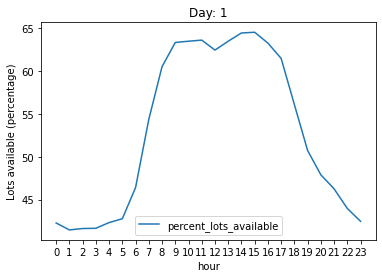

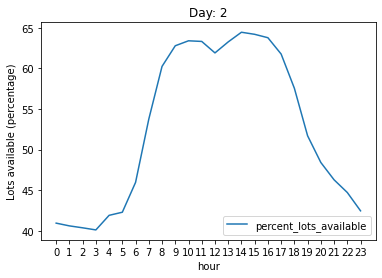

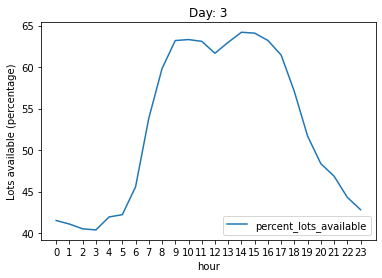

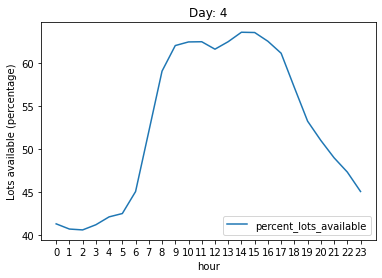

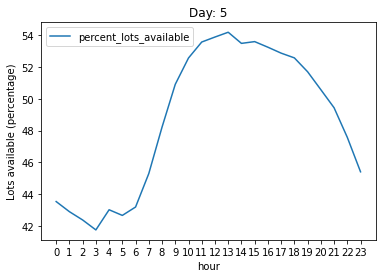

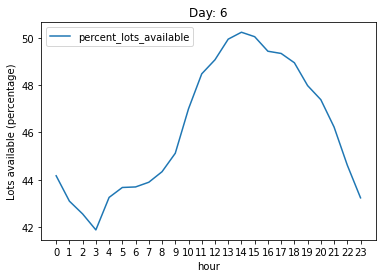

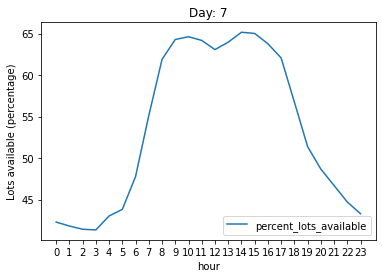

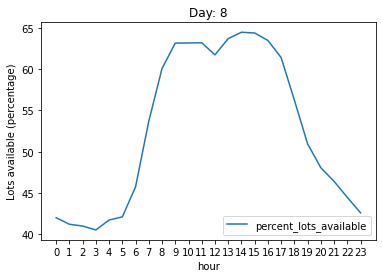

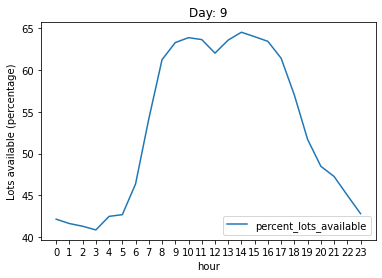

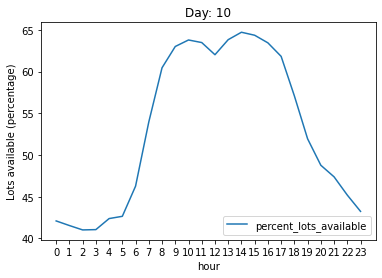

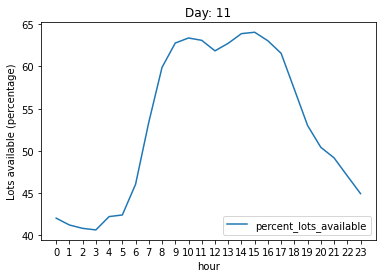

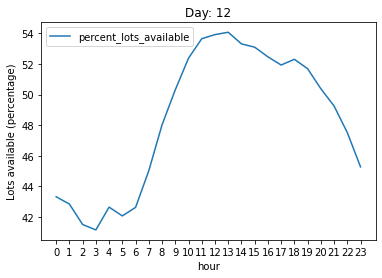

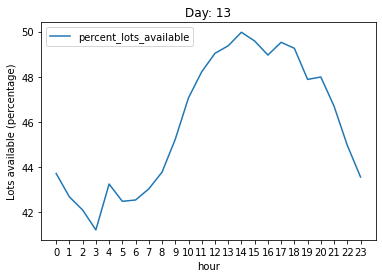

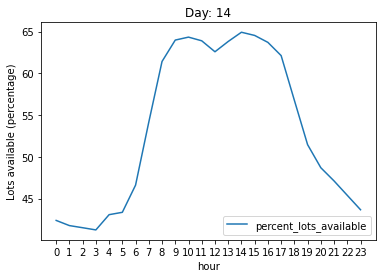

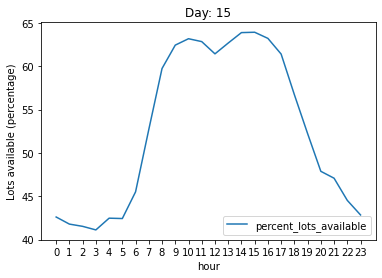

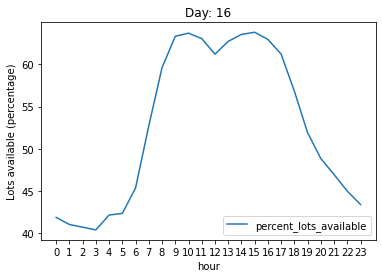

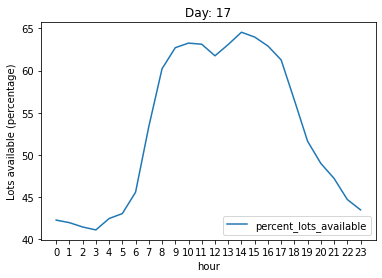

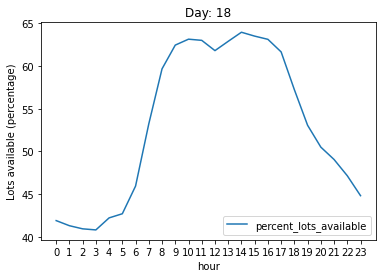

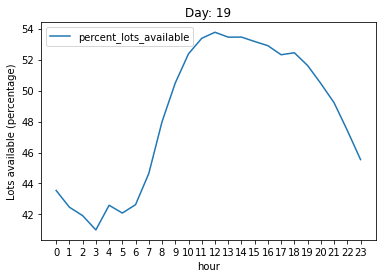

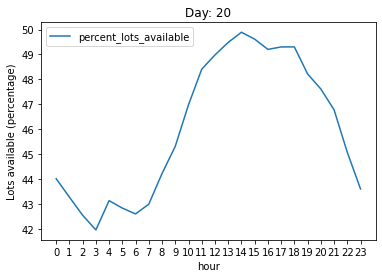

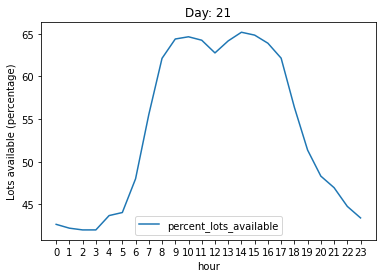

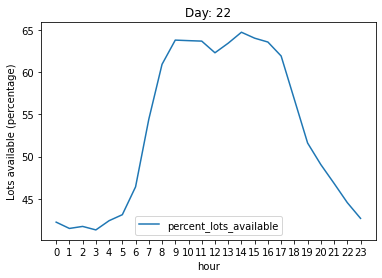

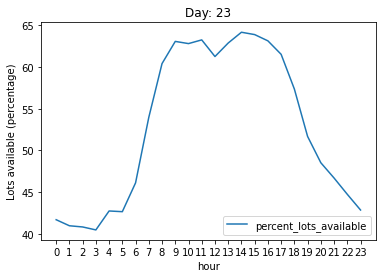

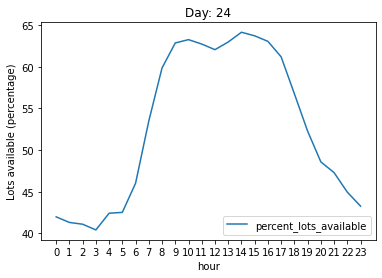

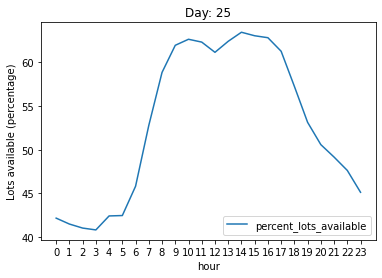

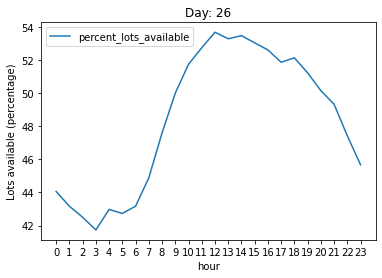

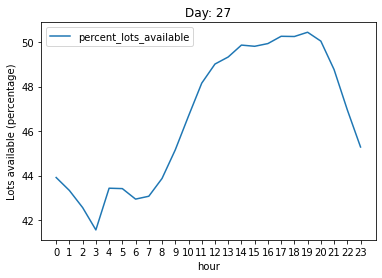

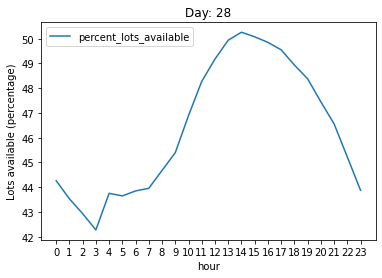

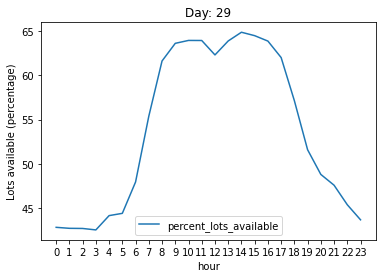

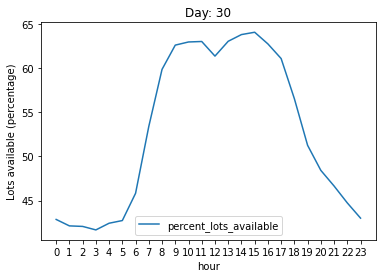

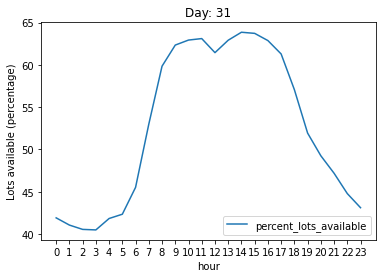

In [22]:
oct_data_19_daily = oct_data_19_cleaned.groupby("day", as_index = False)
for day in oct_data_19_daily.groups.keys():
    day_data = oct_data_19_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    title = "Day: " + str(day)
    hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
                         ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])

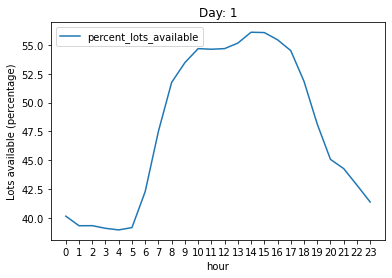

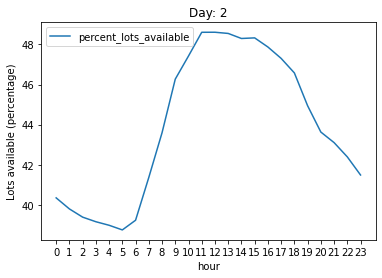

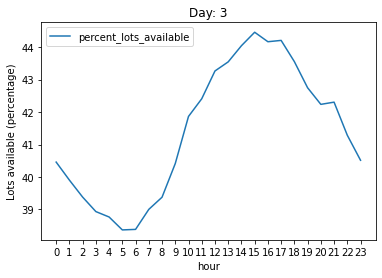

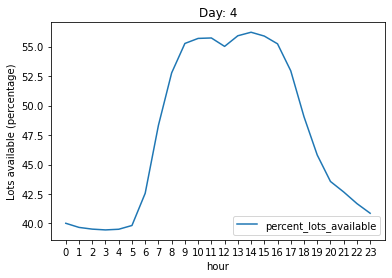

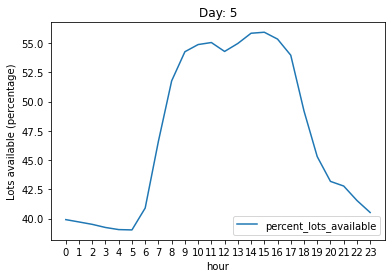

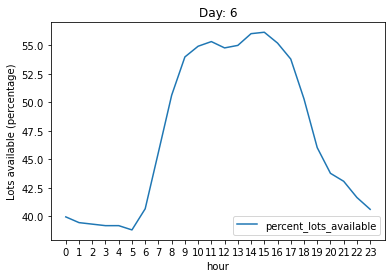

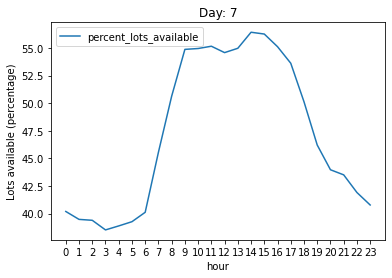

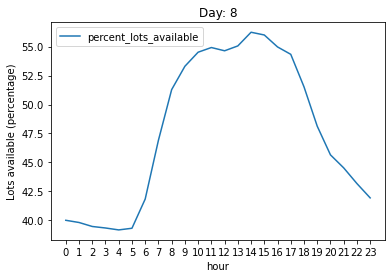

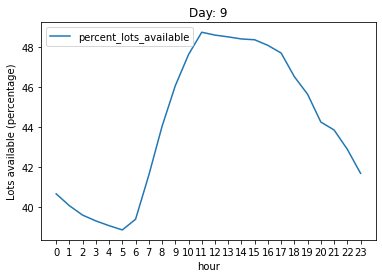

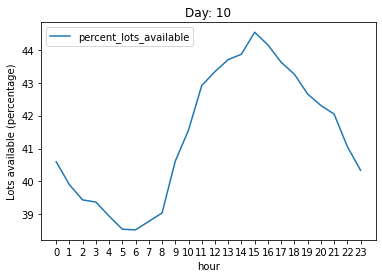

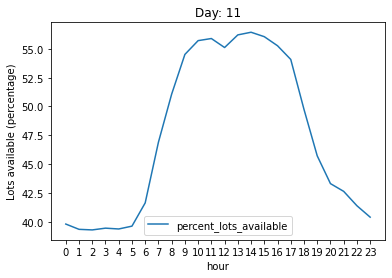

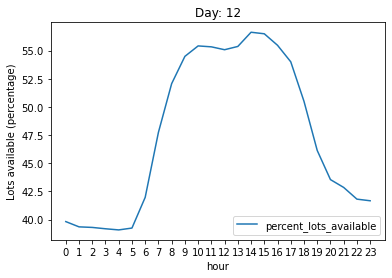

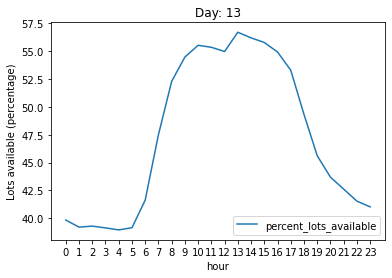

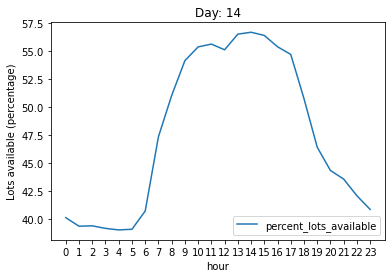

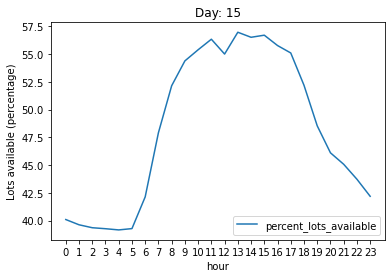

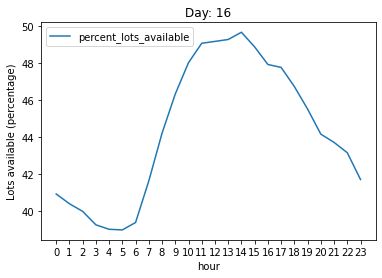

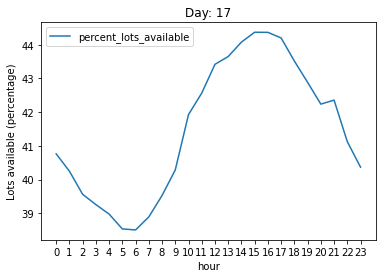

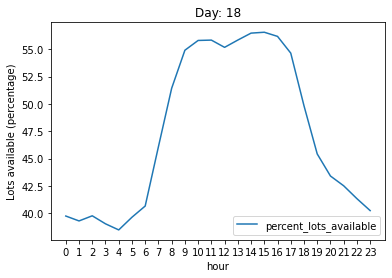

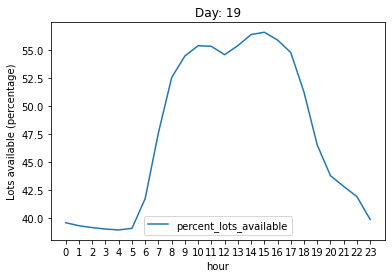

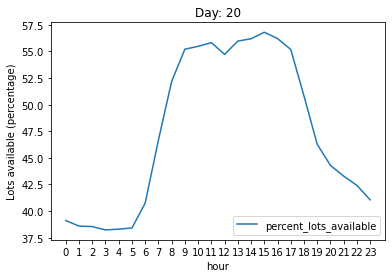

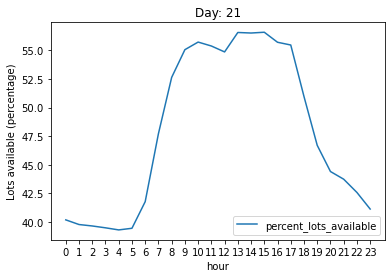

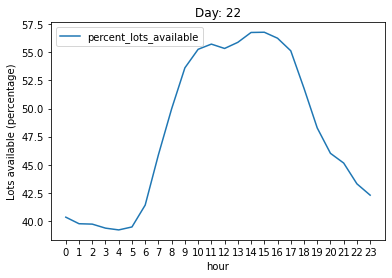

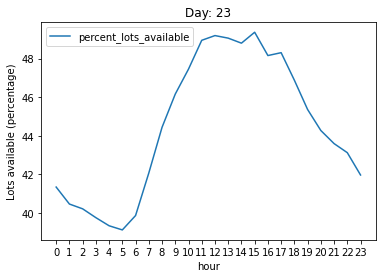

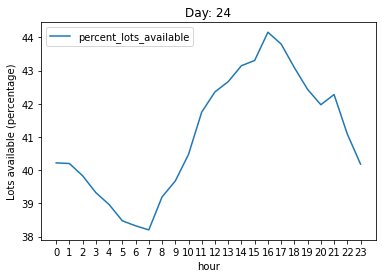

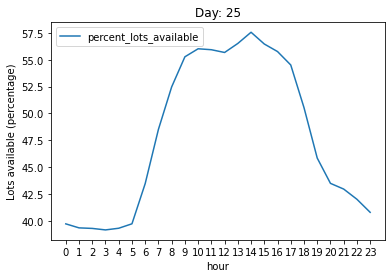

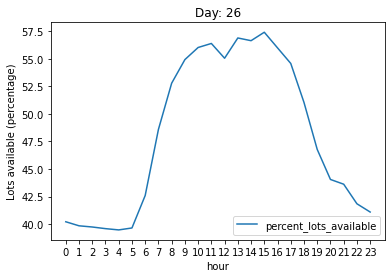

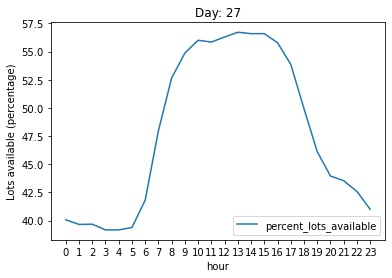

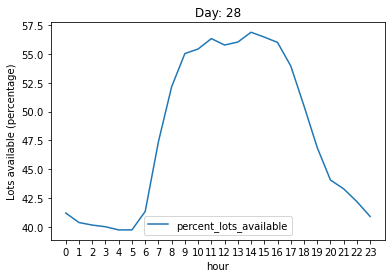

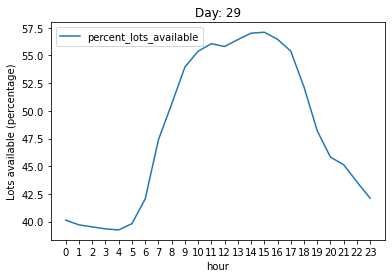

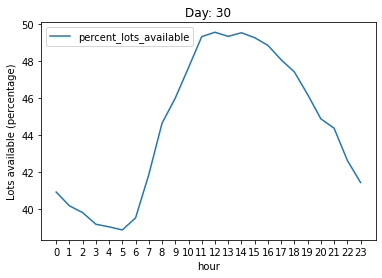

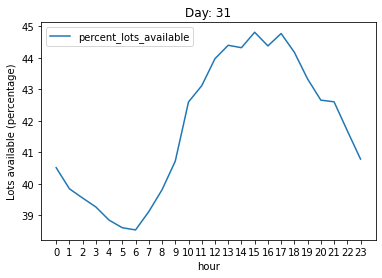

In [23]:
oct_data_21_daily = oct_data_21_cleaned.groupby("day", as_index = False)
for day in oct_data_21_daily.groups.keys():
    day_data = oct_data_21_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    title = "Day: " + str(day)
    hourly_data_day.plot(title = title, y = "percent_lots_available", xlabel = 'hour', \
                         ylabel = 'Lots available (percentage)', xticks = hourly_data_day["hour"])

In [24]:
oct_data_19_cleaned.to_csv("oct19_data_cleaned.csv", index = False)

In [25]:
oct_data_21_cleaned.to_csv("oct21_data_cleaned.csv", index = False)